### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

2024-08-04 16:01:49.845628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 16:01:49.851153: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 16:01:49.870165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 16:01:49.901826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 16:01:49.911858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 16:01:49.935602: I tensorflow/core/platform/cpu_feature_gu

TensorFlow version: 2.17.0
Keras version: 3.4.1


### Q2. Load the Wine Quality dataset and explore its dimensions.
### Dataset: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("wine.csv")

# Explore dimensions
print("Dataset dimensions:", data.shape)
data.head()

Dataset dimensions: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


### Q3. Check for null values, identify categorical variables, and encode them.

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data["quality"].unique()

array(['bad', 'good'], dtype=object)

In [6]:
## Encoding
data['quality']=np.where(data['quality'].str.contains("bad"),0,1)

In [7]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

### Q4. Separate the features and target variables from the dataframe.

In [8]:
# Independent and dependent Variables
X=data.drop('quality',axis=1)
y=data['quality']

### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Q6. Perform scaling on the dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
### Q8. Create a Sequential model and add all the layers to it.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [12]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)



### Q12. Print the model summary.

In [16]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
### Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [17]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [18]:
# Fit the model
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5914 - loss: 0.6649 - val_accuracy: 0.7227 - val_loss: 0.6200
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7307 - loss: 0.5716 - val_accuracy: 0.7266 - val_loss: 0.5753
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7468 - loss: 0.5272 - val_accuracy: 0.7422 - val_loss: 0.5634
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7454 - loss: 0.5257 - val_accuracy: 0.7500 - val_loss: 0.5542
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7422 - loss: 0.5179 - val_accuracy: 0.7578 - val_loss: 0.5489
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - loss: 0.4852 - val_accuracy: 0.7617 - val_loss: 0.5412
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.4832 - val_accuracy: 0.7695 - val_loss: 0.5433
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7607 - loss: 0.4693 - val_accuracy: 0.7734 - 

### Q16. Get the model's parameters.

In [19]:
# Get the model's weights and biases
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)
print("Biases:", biases)


Weights: [[-1.08542722e-02  2.00083464e-01  1.40128717e-01  1.51091572e-02
   1.74069926e-01 -1.83070973e-01 -9.10982341e-02 -7.67292231e-02
   2.87333056e-02  4.94597740e-02  7.83387274e-02 -2.32052878e-01
  -1.85939550e-01  1.46878317e-01  2.27478996e-01  2.42547989e-01
  -1.12195067e-01 -2.67364889e-01  3.67794768e-03  2.36105949e-01
   3.82210985e-02  2.54036546e-01  6.50781989e-02 -2.51692981e-01
   1.91109836e-01 -6.90904036e-02 -1.33553401e-01 -3.23432274e-02
   2.25705896e-02 -1.65286243e-01 -1.22697361e-01  2.86171168e-01
  -1.81474075e-01  2.98879474e-01  1.08082972e-01 -2.03406826e-01
  -1.21962354e-01 -6.20299652e-02 -1.76199570e-01  1.94193169e-01
  -1.39990941e-01  2.82272190e-01 -9.33095887e-02  1.89125925e-01
   3.09491038e-01 -8.41681585e-02 -2.06603438e-01  1.81249790e-02
  -9.32539478e-02 -2.49484047e-01  9.07783657e-02  6.71671778e-02
   2.86297560e-01 -2.81245112e-01  6.97409064e-02  1.82193041e-01
   2.40171999e-01  6.58226758e-02 -2.90688038e-01 -1.10262208e-01
 

### Q17. Store the model's training history as a Pandas DataFrame.

In [20]:
# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)


### Q18. Plot the model's training history.

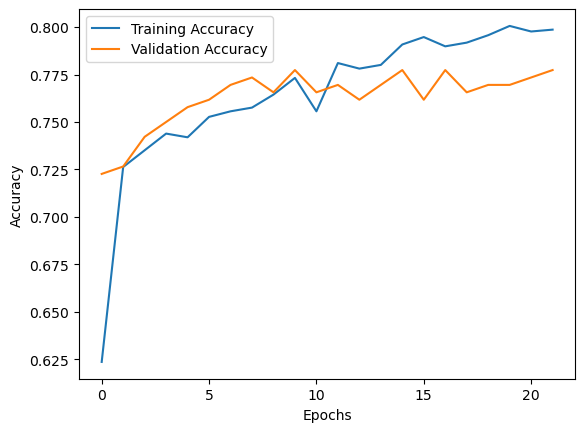

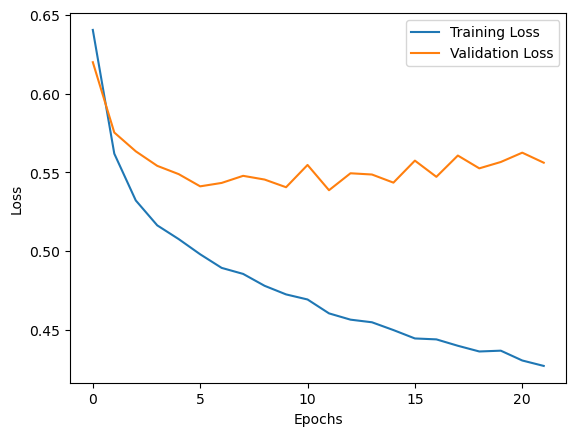

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Q19. Evaluate the model's performance using the test data.

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test loss and accuracy in percentage
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7526 - loss: 0.4811 
Test Loss: 0.4952
Test Accuracy: 74.06%
